In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

# Arrhythmia Dataset

In [3]:
df1 = pd.read_csv('ptbdb_abnormal.csv', header = None)
df2 = pd.read_csv('ptbdb_normal.csv', header = None)

In [4]:
df0 = df1.append(df2)
df0

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df0[187].value_counts()

1.0    10506
0.0     4046
Name: 187, dtype: int64

In [6]:
df = df0[df0[187] == 1].sample(4000)
df = df.append(df0[df0[187] == 0])
df = df.sample(2000)
df[187] = df[187].astype(int)
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
7236,0.965268,0.146165,0.222865,0.237337,0.329957,0.286541,0.164978,0.160637,0.120116,0.138929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9878,0.922053,0.830165,0.873257,0.583650,0.047529,0.000000,0.299113,0.486692,0.579214,0.595691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1075,0.915344,1.000000,0.772487,0.269463,0.000000,0.242630,0.412698,0.611489,0.696523,0.715042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9631,0.925681,0.888889,0.895511,0.850625,0.849890,0.805740,0.732892,0.712288,0.685798,0.685063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3085,0.958737,0.699440,0.361691,0.253693,0.246052,0.148752,0.080489,0.090678,0.084055,0.095772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,0.919309,0.575672,0.136090,0.070253,0.000000,0.058210,0.099157,0.128864,0.137696,0.140907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
770,0.958140,0.942193,0.465116,0.186711,0.000000,0.184718,0.307641,0.342193,0.385382,0.413289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6502,1.000000,0.149338,0.000000,0.030246,0.078450,0.240076,0.289225,0.274102,0.307183,0.314745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5827,1.000000,0.783960,0.392341,0.263728,0.239162,0.197254,0.125000,0.087428,0.094653,0.087428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [7]:
df[187].value_counts()

1    1006
0     994
Name: 187, dtype: int64

# train_test_split

In [8]:
X_train0, X_test0, y_train0, y_test0 = train_test_split(df.iloc[:, :187], df[187], test_size=0.2, random_state=42)

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train0, y_train0, test_size=0.3, random_state=42)

In [10]:
y_train.value_counts()

1    571
0    549
Name: 187, dtype: int64

In [11]:
y_train = y_train.values
y_test = y_test0.values
y_valid = y_valid.values

In [12]:
X_train = X_train.values
X_test = X_test0.values
X_valid = X_valid.values

In [13]:
X_train.shape

(1120, 187)

# MLP

In [14]:
from keras import layers
from keras import models
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint


In [15]:
def multilayer_perc(X_train, y_train, X_valid, y_valid):     
    
    MLP = models.Sequential()
    
    MLP.add(layers.Dense(60, input_shape = (X_train.shape[1],), activation = 'relu'))
    
    MLP.add(layers.Dense(60, activation = 'sigmoid'))
        
    MLP.add(layers.Dense(60, activation = 'sigmoid'))
    
    MLP.add(layers.Dense(60, activation = 'relu'))
    
    MLP.add(layers.Dense(1, activation = 'sigmoid'))
    
    sgd = tf.keras.optimizers.SGD(learning_rate = 0.05)
    MLP.compile(optimizer = sgd, loss = "binary_crossentropy", metrics = ['accuracy'])
    
    callback = ModelCheckpoint(filepath = 'weights_MLP.h5', monitor = 'val_loss', save_best_only = True)

    history = MLP.fit(X_train, y_train, epochs = 500, callbacks = [callback], batch_size = 50, validation_data = (X_valid,y_valid))
    
    MLP.summary()
    return(MLP, history)

In [16]:
MLP, history = multilayer_perc(X_train, y_train, X_valid, y_valid)

Epoch 1/500
23/23 [==============================] - 1s 8ms/step - loss: 0.6984 - accuracy: 0.4955 - val_loss: 0.6930 - val_accuracy: 0.4979
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4991 - val_loss: 0.6919 - val_accuracy: 0.5917
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.4955 - val_loss: 0.6917 - val_accuracy: 0.5646
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5321 - val_loss: 0.6915 - val_accuracy: 0.5813
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.5009 - val_loss: 0.6917 - val_accuracy: 0.4979
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.4979
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5125 - val_loss: 0.6911 - val_accuracy: 0.4979
Epoch 8/500
2

Epoch 59/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5361 - accuracy: 0.7446 - val_loss: 0.5387 - val_accuracy: 0.7354
Epoch 60/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.7330 - val_loss: 0.5591 - val_accuracy: 0.6917
Epoch 61/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5265 - accuracy: 0.7429 - val_loss: 0.5383 - val_accuracy: 0.7437
Epoch 62/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7384 - val_loss: 0.5211 - val_accuracy: 0.7208
Epoch 63/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7527 - val_loss: 0.5197 - val_accuracy: 0.7479
Epoch 64/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7446 - val_loss: 0.5170 - val_accuracy: 0.7229
Epoch 65/500
23/23 [==============================] - 0s 3ms/step - loss: 0.5113 - accuracy: 0.7491 - val_loss: 0.5094 - val_accuracy: 0.7292
Epoch 

23/23 [==============================] - 0s 3ms/step - loss: 0.3660 - accuracy: 0.8446 - val_loss: 0.4357 - val_accuracy: 0.8000
Epoch 117/500
23/23 [==============================] - 0s 3ms/step - loss: 0.4077 - accuracy: 0.8304 - val_loss: 0.4178 - val_accuracy: 0.8062
Epoch 118/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3696 - accuracy: 0.8446 - val_loss: 0.4608 - val_accuracy: 0.7896
Epoch 119/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8500 - val_loss: 0.3886 - val_accuracy: 0.8333
Epoch 120/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3651 - accuracy: 0.8446 - val_loss: 0.4682 - val_accuracy: 0.7896
Epoch 121/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8616 - val_loss: 0.3849 - val_accuracy: 0.8354
Epoch 122/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3819 - accuracy: 0.8330 - val_loss: 0.3733 - val_accuracy: 0.8417
Epoch 123/500

23/23 [==============================] - 0s 2ms/step - loss: 0.2840 - accuracy: 0.8911 - val_loss: 0.3970 - val_accuracy: 0.8208
Epoch 174/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9071 - val_loss: 0.3199 - val_accuracy: 0.8604
Epoch 175/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8946 - val_loss: 0.4493 - val_accuracy: 0.7688
Epoch 176/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2575 - accuracy: 0.8911 - val_loss: 0.3184 - val_accuracy: 0.8687
Epoch 177/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.9071 - val_loss: 0.3196 - val_accuracy: 0.8687
Epoch 178/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2749 - accuracy: 0.8893 - val_loss: 0.3310 - val_accuracy: 0.8646
Epoch 179/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.8920 - val_loss: 0.4273 - val_accuracy: 0.7917
Epoch 180/500

23/23 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9277 - val_loss: 0.3092 - val_accuracy: 0.8917
Epoch 231/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1976 - accuracy: 0.9295 - val_loss: 0.3174 - val_accuracy: 0.8646
Epoch 232/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.9036 - val_loss: 0.3086 - val_accuracy: 0.8667
Epoch 233/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1791 - accuracy: 0.9411 - val_loss: 0.2971 - val_accuracy: 0.8771
Epoch 234/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9321 - val_loss: 0.2989 - val_accuracy: 0.8813
Epoch 235/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9259 - val_loss: 0.3815 - val_accuracy: 0.8667
Epoch 236/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2597 - accuracy: 0.8902 - val_loss: 0.5452 - val_accuracy: 0.7396
Epoch 237/500

23/23 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9304 - val_loss: 0.4251 - val_accuracy: 0.8687
Epoch 288/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9259 - val_loss: 0.4300 - val_accuracy: 0.8562
Epoch 289/500
23/23 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.8911 - val_loss: 0.4352 - val_accuracy: 0.7979
Epoch 290/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9402 - val_loss: 0.3008 - val_accuracy: 0.8896
Epoch 291/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9563 - val_loss: 0.2931 - val_accuracy: 0.8917
Epoch 292/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9339 - val_loss: 0.4619 - val_accuracy: 0.8500
Epoch 293/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9402 - val_loss: 1.2700 - val_accuracy: 0.7521
Epoch 294/500

23/23 [==============================] - 0s 2ms/step - loss: 0.1240 - accuracy: 0.9563 - val_loss: 0.4327 - val_accuracy: 0.8208
Epoch 345/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1800 - accuracy: 0.9295 - val_loss: 0.2920 - val_accuracy: 0.8896
Epoch 346/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9688 - val_loss: 0.3122 - val_accuracy: 0.8917
Epoch 347/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9688 - val_loss: 0.3854 - val_accuracy: 0.8500
Epoch 348/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9741 - val_loss: 0.3024 - val_accuracy: 0.9000
Epoch 349/500
23/23 [==============================] - 0s 2ms/step - loss: 0.2422 - accuracy: 0.9179 - val_loss: 0.2980 - val_accuracy: 0.8875
Epoch 350/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9696 - val_loss: 0.3520 - val_accuracy: 0.8625
Epoch 351/500

23/23 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9857 - val_loss: 0.3559 - val_accuracy: 0.8938
Epoch 402/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9768 - val_loss: 0.3039 - val_accuracy: 0.8938
Epoch 403/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9830 - val_loss: 0.3079 - val_accuracy: 0.8958
Epoch 404/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0545 - accuracy: 0.9866 - val_loss: 0.4061 - val_accuracy: 0.8896
Epoch 405/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9875 - val_loss: 0.3484 - val_accuracy: 0.8771
Epoch 406/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9848 - val_loss: 0.3816 - val_accuracy: 0.8979
Epoch 407/500
23/23 [==============================] - 0s 2ms/step - loss: 0.1394 - accuracy: 0.9509 - val_loss: 0.8431 - val_accuracy: 0.8271
Epoch 408/500

23/23 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9946 - val_loss: 0.3862 - val_accuracy: 0.8979
Epoch 459/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9955 - val_loss: 0.3666 - val_accuracy: 0.9000
Epoch 460/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9955 - val_loss: 0.3944 - val_accuracy: 0.9042
Epoch 461/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 0.9937 - val_loss: 0.3835 - val_accuracy: 0.9083
Epoch 462/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9955 - val_loss: 0.4088 - val_accuracy: 0.8979
Epoch 463/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9964 - val_loss: 0.3834 - val_accuracy: 0.8958
Epoch 464/500
23/23 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9964 - val_loss: 0.3987 - val_accuracy: 0.9042
Epoch 465/500

In [17]:
#loaded_model.load_weights('weights_MLP.h5')

In [18]:
def evaluate_model(model, history, X_test, y_test):
    scores = model.evaluate((X_test), y_test, verbose = 0) # verbose - выводит шкалу прогресса
    print("Accuracy: %.2f%%" % (scores[1]*100)) # score - список из loss и accuracy
    
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc = 'lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model - Loss')
    plt.legend(['Training', 'Validation'], loc = 'upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    
    target_names=['0','1','2','3','4']
    
    y_true = []
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba, axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

In [19]:
def predict_model(model, X):
    prediction_proba = model.predict(X)
    prediction = [int(x >= 0.5) for x in prediction_proba]
    return prediction

In [20]:
MLP.predict(X_test)

array([[8.78743529e-01],
       [1.24335289e-04],
       [9.99796629e-01],
       [5.79476357e-04],
       [1.90032125e-02],
       [1.28247837e-06],
       [9.27925110e-04],
       [9.99976575e-01],
       [9.56177711e-04],
       [1.61278248e-03],
       [9.99773204e-01],
       [9.99374092e-01],
       [9.98171091e-01],
       [1.06945636e-05],
       [7.12513924e-04],
       [9.93974566e-01],
       [6.84055686e-03],
       [9.97171760e-01],
       [1.89962266e-05],
       [9.99535084e-01],
       [2.22014078e-05],
       [7.70747662e-04],
       [1.32113695e-04],
       [1.71750784e-04],
       [1.83643751e-05],
       [9.99993622e-01],
       [9.93790686e-01],
       [9.98777390e-01],
       [9.96788800e-01],
       [9.99891877e-01],
       [2.26787001e-01],
       [9.99945045e-01],
       [4.30259297e-06],
       [9.82467771e-01],
       [1.14974082e-02],
       [9.99986529e-01],
       [2.42795904e-05],
       [9.96803582e-01],
       [9.99975443e-01],
       [9.93295074e-01],


Accuracy: 89.50%


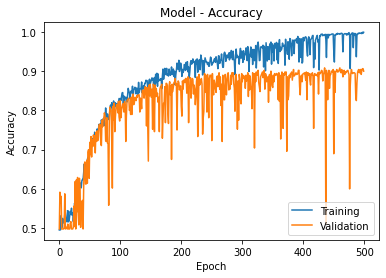

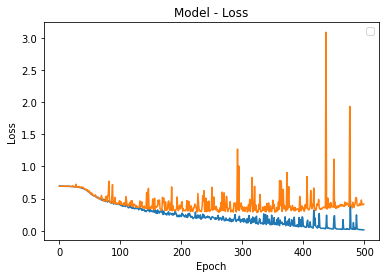

In [21]:
evaluate_model(MLP, history, X_test, y_test)

# Confusion matrix

In [22]:
y_pred = predict_model(MLP, X_test)

In [23]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test0, y_pred)
conf_mx

array([[185,  19],
       [ 23, 173]], dtype=int64)

In [24]:
from itertools import product

def plot_conf_matrix(cm, target_names): 
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    thresh = cm.max() / 2
    
    plt.figure(figsize=(10, 8))
    plt.imshow(conf_mx, interpolation='nearest', cmap = plt.get_cmap('Blues'))
    
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    tick_marks = np.arange(len(target_names))
    plt.xticks(target_names)
    plt.yticks(tick_marks, target_names)
        
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.colorbar()
    plt.show()

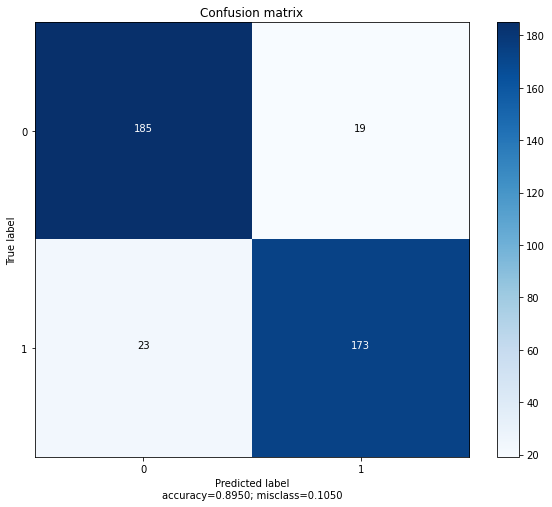

In [25]:
plot_conf_matrix(conf_mx, target_names = range(2))